# EDA of Titanic dataset

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/vogdb/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
train_df = pd.read_csv('./dataset/train.csv')
train_df.columns = [col.strip().replace(' ', '_').lower() for col in train_df.columns]
train_df.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### columns with null

In [10]:
train_df.isnull().sum(axis=0)

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

#### how many survived

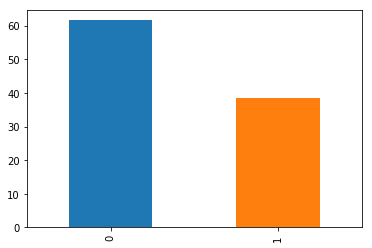

In [15]:
(train_df.survived.value_counts(normalize=True) * 100).plot.bar()

In [16]:
train_df.survived.value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [23]:
# the min accuracy is
min_accuracy = max(train_df.survived.value_counts(normalize=True) * 100)
print('Min accuracy is: {:.2f}'.format(min_accuracy))

Min accuracy is: 61.62


### Bivariate with `survived`

#### `sex` and `survived` 

In [62]:
train_df[['sex', 'survived']].groupby('sex').mean()

,survived
sex,
female,0.742038
male,0.188908


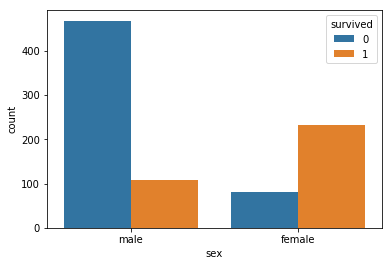

In [67]:
sns.countplot(x='sex', hue='survived', data=train_df)

#### `pclass` and `survived`

In [75]:
pd.crosstab(train_df.pclass, train_df.survived, margins=True, normalize=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,0.0897868,0.152637,0.242424
2,0.108866,0.0976431,0.20651
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1


In [79]:
train_df[['pclass', 'survived']].groupby('pclass').mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


/Users/vogdb/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


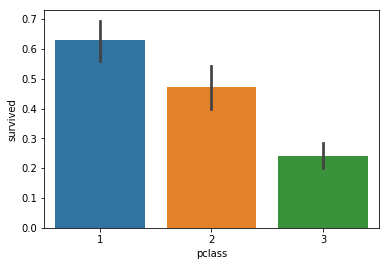

In [80]:
sns.barplot(x='pclass', y='survived', data=train_df)

In [86]:
pd.crosstab([train_df.sex, train_df.survived], train_df.pclass, normalize=True)

pclass                  1         2         3
sex    survived                              
female 0         0.003367  0.006734  0.080808
       1         0.102132  0.078563  0.080808
male   0         0.086420  0.102132  0.336700
       1         0.050505  0.019080  0.052750

In [87]:
pd.crosstab([train_df.sex, train_df.survived], train_df.pclass, margins=True)

pclass             1    2    3  All
sex    survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [ ]:
sns.factorplot()